## Exploring Tf-IDF

In this notebook you will be exploring the computation of the Tf-IDF feature using a very popular dataset called 20 newsgroups.

The resources you should use to complete this notebook are:
1.  https://en.wikipedia.org/wiki/Tf%E2%80%93idf
2.  http://www.tfidf.com/

the 20 newsgroups by date dataset
Number of posts 11314


/home/mackenzie/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


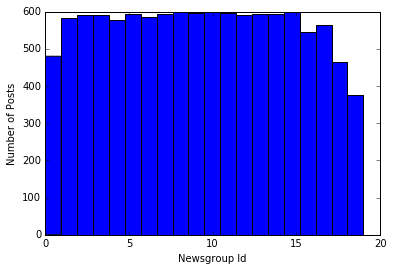

First post!
I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.


In [1]:
%matplotlib inline
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))

post_texts = data.data
news_group_ids = data.target

print data.description

print "Number of posts", len(data.data)
import matplotlib.pyplot as plt
plt.hist(data.target, bins=20)
plt.xlabel('Newsgroup Id')
plt.ylabel('Number of Posts')
plt.show()

print "First post!"
print data.data[0]

Next, you will be writing a function to compute the term frequency part of [Tf-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf).  It's up to you how fancy to make this function.  In my simple version, I used split after first removing leading or trailing punctuation (I used the `strip` function) and also converting the words to lower case.

In [2]:
import re #I love regular expressions
from collections import Counter #I also love the collections package
def tf(text):
    """ Returns a dictionary where keys are words that occur in text
        and the value is the number of times that each word occurs. """
    return Counter(re.findall(r"[\w']+",text.lower()))
    #If i were to do term frequency I'd take the frequency value and divide it by len(re.findall(r"[\w']+", text.lower()))
            
        

print tf(data.data[0])


Counter({u'the': 6, u'was': 4, u'car': 4, u'this': 4, u'a': 3, u'i': 3, u'of': 2, u'is': 2, u'it': 2, u'from': 2, u'anyone': 2, u'if': 2, u'on': 2, u'model': 1, u'all': 1, u'be': 1, u'engine': 1, u'rest': 1, u'bumper': 1, u'really': 1, u'have': 1, u'in': 1, u'where': 1, u'saw': 1, u'specs': 1, u'enlighten': 1, u'late': 1, u'tellme': 1, u'bricklin': 1, u'there': 1, u'please': 1, u'sports': 1, u'to': 1, u'other': 1, u'wondering': 1, u'mail': 1, u'you': 1, u'body': 1, u'door': 1, u'doors': 1, u'60s': 1, u'separate': 1, u'addition': 1, u'70s': 1, u'early': 1, u'whatever': 1, u'know': 1, u'front': 1, u'2': 1, u'years': 1, u'day': 1, u'production': 1, u'me': 1, u'made': 1, u'e': 1, u'name': 1, u'could': 1, u'or': 1, u'looked': 1, u'funky': 1, u'info': 1, u'can': 1, u'were': 1, u'small': 1, u'looking': 1, u'out': 1, u'called': 1, u'history': 1})


Next, you will be writing a function to compute the inverse document frequency part of [Tf-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf).

In [4]:
from math import log
import re
import operator
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))


def idf(data):
    """ Takes a list and returns a dictionary where the keys are words and the values are inverse
        document frequencies.  For this function you should use the formula
        idf(w, data) = log(N / |text in data that contain the word w|) """
    tNumDict={}
    for text in data:
        cleanedText =list(set(re.findall(r"[\w']+",text.lower())))
        for word in cleanedText:
            if word not in tNumDict:
                tNumDict[word]=1
            else:
                tNumDict[word] +=1
    for key in tNumDict:
        tNumDict[key] = log(len(data)/tNumDict[key])
    return tNumDict 

idf = idf(data.data)

sorted_idf = sorted(idf.items(), key=operator.itemgetter(1))

print "Lowest IDF (most common)"
for d in sorted_idf[0:10]:
    print d

print ""
print "Highest IDF (least common)"
rev_sorted_idf = sorted(idf.items(), key=operator.itemgetter(1))
for d in reversed(rev_sorted_idf[-10:]):
    print d

{u'3ds2scn': 9.333796175903101, u'unsupportable': 9.333796175903101, u'l1tbk': 9.333796175903101, u'porkification': 9.333796175903101, u'mbhi8bea': 9.333796175903101, u'luanch': 9.333796175903101, u'woods': 6.848005274576363, u'ree84': 8.640648995343156, u'mdbs': 9.333796175903101, u'hanging': 6.154858094016418, u'woody': 7.541683099882111, u'trawling': 9.333796175903101, u'localized': 7.947325027016463, u'spidery': 9.333796175903101, u'disobeying': 8.640648995343156, u'canes': 9.333796175903101, u'os2faq': 9.333796175903101, u'sprague': 8.640648995343156, u'brockton': 8.640648995343156, u'5986': 9.333796175903101, u'cfb': 7.254177846456518, u'crossbar': 9.333796175903101, u'rickman': 9.333796175903101, u'vlbi': 7.947325027016463, u'_xogkyrzaup': 9.333796175903101, u'naturopathic': 9.333796175903101, u'ztbn': 9.333796175903101, u'trojan': 8.640648995343156, u'pigment': 8.640648995343156, u'ua8cx': 9.333796175903101, u"9l2'": 9.333796175903101, u'misunderstands': 9.333796175903101, u'br

The last step in Tf-IDF is to compute the product of tf and IDF for each document, and then convert the resultant dictionary of Tf-IDF features into a vector.  We'll be discussing this next class.

## Clarifying Questions

Use this space to ask questions regarding the content covered in the reading. These questions should be restricted to helping you better understand the material. For questions that push beyond what is in the reading, use the next answer field. If you don't have a fully formed question, but are generally having a difficult time with a topic, you can indicate that here as well.

Is the tF-IDF always generated for a range of words? It seems like it'd be more efficient to only look for the tF-IDF of a single word.Are there any sentiment analysis techniques that only search for a few key words? 

I'd also like to know what we're actually counting as words. Some of the keys that made it into my dictionary look like they're nonsense words, typos, abbreviations, and acronyms. Are these usually filtered out, or do these have some value?

## Enrichment Questions

Use this space to ask any questions that go beyond (but are related to) the material presented in this reading. Perhaps there is a particular topic you'd like to see covered in more depth. Perhaps you'd like to know how to use a library in a way that wasn't show in the reading. One way to think about this is what additional topics would you want covered in the next class (or addressed in a followup e-mail to the class). I'm a little fuzzy on what stuff will likely go here, so we'll see how things evolve.

I'd love to look at scripts that use tF-IDF effictively that you(Paul) think are good applications. Other sentiment analysis techniques would be cool to compare and learn about 

## Additional Resources / Explorations

If you found any useful resources, or tried some useful exercises that you'd like to report please do so here. Let us know what you did, what you learned, and how others can replicate it.